# Pénzügyi adatelemzés 
### Első házi feladat
### Homoszkedaszticitás tesztelés

A házi feladatot itt a notebook-ban kell megoldani
- legfeljebb 4 fős csapatokban és
- ipynb (Jupyter Notebook) formátumban a Moodle-re feltölteni <span style="color:red">**2025-10-31 péntek du. 4**</span> óráig, csapatonként EGY példányban (tehát NE töltse fel mindenki).
- A csapatokra vonatkozólag nincs más megkötés, mint, hogy legfeljebb 4 fősek lehetnek, lehet dolgozni akár párban, akár egyedül is és nem szükséges a csapattagoknak ugyanabba a szemináriumi csoportba járni. 
- A csapattagok nevét, Neptun-kódját és "uni-corvinus"-os e-mail címét írjátok be a notebook második cellájába. Minden feltöltött file-ra az a hallgató fog pontot kapni, akinek az adatai itt hibátlanul szerepelnek. Ha ugyanaz a csapat több file-t is feltölt, akkor pontot vonunk le. 

Minden kérdés után van a szöveges válasznak vagy kódnak egy üres cella, de természetesen lehet újabb cellákat is beszúrni és további függvényeket írni.

Nem feltétlenül elegendő az előre megírt függvényeket kiegészíteni, a kódnak minden, a feladatben kért output-ot el kell készítenie és a cellákra sorban kattintva hibátlanul lefutnia. A feladat értékelésénél nem fogunk semmilyen további kódot hozzáírni, ha valaki elfelejt meghívni egy függvényt, akkor pontot veszíthet. Mivel a notebook egyetlen session, emlékszik minden változóra, akkor is, ha az azt létrehozó kódot később kitöröljük, így ellenőrzésként célszerű a végső verzió tesztelése előtt újraindítani a kernel-t vagy bezárni a file-t újraindítani a szervert, és úgy kipróbálni.

Az elméleti kérdésekre adott válaszok legyenek rövidek, pontosak, lényegre törőek, a szükséges mennyiségű, de nem több indoklással. Aki válaszként mindent is leír, (ahogy a chatGPT szokta), azt negatívan értékeljük. Az ábrákat nem kell "szép"-re formázni, megfelelnek az alapértelmezett beállítások. A kódok a kért feladatokat oldják meg, ne valami mást vagy általánosabbat, a számítások egyes lépéseit szükség esetén egy-két szavas kommentekkel el lehet látni.

AI indokolt esetben és módon használható, de meg kell jelölni, hogy hol, mire és miért használtátok. Ha Python kód generálásra használtok generatív AI-t, akkor másoljátok ki a promt-ot (az AI-nak adott utasítást) egy külön cellába.

A szimulációk paramétereit a beadott file-ban úgy állítsátok be, hogy a kódok futása gyors (legfeljebb néhány másodperc) legyen, de a szöveges válaszokban összefoglalhatjátok a szimulációk eredményeit nagyobb mintaelemszámra is. Sokáig futó kódhoz célszerű a `tqdm` package `tqdm` függvényét használni, ami egy szépen formázott progressbart készít egy `for` ciklushoz. 

**Csapat tagjai (név, neptun kód, e-mail-cím):**




In [1]:
# A cellákban külön importokat ne tegyünk, egy helyen töltsük be az összes felhasznált package-t. 
# Az összes feladat megoldható ezekkel (de persze lehet bővíteni a listát):

from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan
from tqdm import tqdm

#### 1. Feladat

Legyen $X$ és $Y$ független standard normális eloszlású valószínűségi változók, és legyen $m\in\mathbb{N}$ egy pozitív egész szám. Szimulációval becsüljük meg az 

\begin{equation}
Y^2\sim \beta_x X+\beta_0
\tag{SQ}
\end{equation}

regressziós egyenlet egy $m$ elemű mintából becsült bétájának és $R^2$-ének eloszlását. 

- A tanult elmélet alapján mit tudunk mondani $\beta_x$ és az $R^2$ eloszlásáról?
- Ábrázoljuk vizuálisan (hisztogram, sűrűségfüggvény) a szimulációval becsült $\beta_x$ és $R^2$ eloszlását.


<div style="color: blue">
Válasz:

Mivel $X$ és $Y$ független normális eloszálsú, és $Y$ négyzetre van emelve, ezért nem várunk nagy magyarázó erőt a modelltől, az $R^2$ eloszálást erősen 0 közeli, balra ferdének várjuk.

A $\beta_x$-re 0 várható értékű normális eloszlást várunk (a négyzetre emelt normális eloszlású változók egy vízszintes egyenesre esnek), viszont mivel a regresszált változók függetlenek, ezért a $\beta$ szórása a várható érték körül magas, és minél nagyobb a minta elemszáma, várhatóan annál laposabb lesz az eloszlása (több szélső érték is megjelenik).
</div>

<Axes: ylabel='Density'>

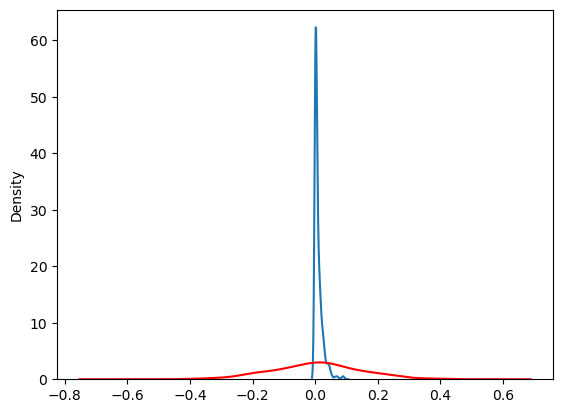

In [2]:
m = 1000

# példa ábrázolás
#x = np.random.normal(size = m)
#y = np.random.normal(size = m)
#plt.scatter(x, y**2, s = 0.5)

def sim_sqr(m):
    x = np.random.normal(size = m)
    X = sm.add_constant(x)
    y = np.random.normal(size = m)

    res = sm.OLS(y**2, X).fit()

    return res

R2 = [sim_sqr(100).rsquared for _ in range(m)]
Beta = [sim_sqr(100).params[1] for _ in range(m)]
sns.kdeplot(R2)
sns.kdeplot(Beta, color = "red")

#### 2. Feladat

Legyen $X$ standard normális eloszlású valószínűségi változó, és legyen 
\begin{equation}
Y = 2X + 1 + N\left(0, 0.04 + \alpha X^2\right)
\tag{H}
\end{equation}
ahol $\alpha\in\mathbb{R}$ egy pozitív paraméter, N a normális eloszlást jelöli, a paraméterek a várható érték és a variancia (a szimulációhoz ebből gyököt kell vonni, mert a numpy a normális eloszlást a várható értékkel és a szórással paraméterezi).

- Az $\alpha$ paraméter mely értéke(i) mellett tesz eleget a folyamat a homoszkedaszticitás feltételének és miért?
- Írjunk függvényt, ami adott $m$ és $\alpha$ mellett $m$ elemű mintát generál az $(X,Y)$ eloszlásból.

<div style="color: blue">
Válasz: A homoszkedaszticitásnak az $\alpha = 0$ esetben tesz csak eleget, mivel minden más esetben függ a rezidumok szórása a $x$ értékétől.
</div>

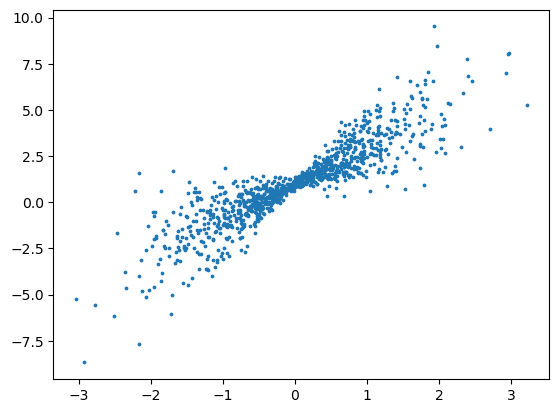

In [3]:
def generate_data(m, alpha):
    x = np.random.normal(size = m)
    y = 2*x+1+np.random.normal(0,np.sqrt(0.04+alpha*x**2),size = m)
    return [x, y]

X, Y = generate_data(1000, 1)
plt.scatter(X, Y, s = 3)

#### 3. Feladat

Írjunk függvényt, ami szimulálja a $(H)$ formulával meghatározott eloszlású változókra illesztett regresszió egy $m$ elemű mintából becsült  együtthatóinak eloszlását.

- Miben és mennyire térnek el az eloszlások az $\alpha$ paramétertől függően?
- Torzítatlan, illetve
- konzisztens lesz-e a becslés?

<div style="color: blue">
Válasz:
    
Az $\alpha$ paraméter növelésével a $\beta_x$ értékek szórása fog nőni, mivel az $Y$ értékekre nem lehet mindig hasonló meredekségű egyenest illeszteni.

A heteroszkedaszticitás jelenléte a paraméterbecslés torzítatlanságát és konzisztensségét nem fogja elrontani, egyedül a t-tesztek értékeit befolyásolja (nem mutat szignifikánsnak egy valójában szignifikáns magyarázó változót).
</div>

<Axes: ylabel='Density'>

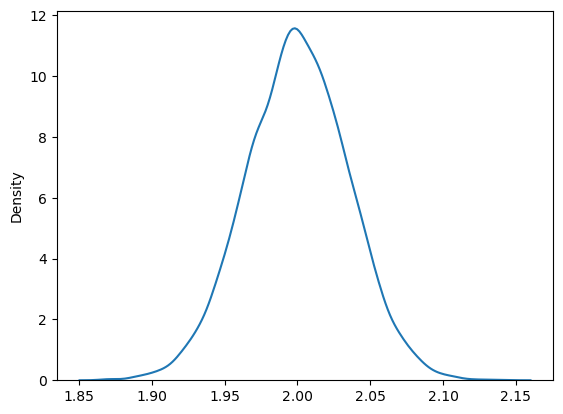

In [4]:
def sim_heteroscedasticity(m, alpha):
    x, y = generate_data(m, alpha)
    X = sm.add_constant(x)
    res = sm.OLS(y, X).fit()
    
    return (res.params[0], res.params[1])

params = [sim_heteroscedasticity(1000, 0.4) for _ in range(10000)]
beta0 = [p[0] for p in params]
beta1 = [p[1] for p in params]
sns.kdeplot(beta1)

#### 4. Feladat

A [Breusch-Pagan](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test) teszt egy tetszőleges
$$ Y = \beta^Tx + \beta_0 + \varepsilon(\sigma_x)$$
lineáris regresszióban a homoszkedaszticitás detektálására szolgáló statisztikai teszt. Nullhipotézise, hogy $\sigma_x = \sigma$ az $x$-től valójában nem függő konstans. Technikailag úgy működik, hogy 

- elvégezzük a regresszió praméterbecslését,
- kiszámoljuk az $\varepsilon$ becsült hibatagokat és
- a variancia ML-becslését $\hat\sigma^2 = \frac{\sum\varepsilon_i}{n}$ (ez egy értelmetlen kifejezés, ha a nullhipotézis nem tejlesül),   
- majd ezekből kiszámoljuk a standardizált reziduálisok négyzetét: $g = \varepsilon^2/\hat\sigma^2$
- és ezeket újra regresszáljuk az eredeti magyarázó változókkal\begin{equation}g\sim\gamma^Tx + \gamma_0.\tag{S}\end{equation}

Megmutatható, hogy $$nR^2\stackrel{H_0}{\longrightarrow}\chi^2_{p-1},$$ ahol $R^2$ az (S) segéd-regresszió $R^2$-e, így erre tudunk egy aszimptotikus $\chi^2$-tesztet végezni.

írjunk egy saját függvényt, a `statsmodels.stats.diagnostic` package `het_breuschpagan` függvényének reprodukálására, azaz

- implementáljuk a Breusch-Pagan teszt segédregresszióját,
- számítsuk ki az $R^2$-et és a $\chi^2$-teszt $p$-értékét, és

az eredményt hasonlítsuk összes a beépített függvény output-jával. 

In [5]:
def bp_test_with_built_in_function(data):
    X = sm.add_constant(data[0])
    res = sm.OLS(data[1], X).fit()
    bp_test = het_breuschpagan(res.resid, res.model.exog, True) # robosztus teszt esetén nR2 -> Chi2 => LM/n ~ R2 (n -> inf)
    return bp_test[0]/m, bp_test[1]

# bp_test_with_built_in_function(data)

In [6]:
def my_bp_test(data):
    X = sm.add_constant(data[0])
    res = sm.OLS(data[1], X).fit()
    
    sigma_hat = sum(res.resid**2)/m
    g = res.resid**2/sigma_hat
    auxreg = sm.OLS(g, X).fit()
    R2 = auxreg.rsquared
    LM = m * R2
    pvalue = stats.chi2.sf(LM, df = 1)
    
    return R2, pvalue
# my_bp_test(data)

In [7]:
# Összehasonlítás:
m = 100
alpha = 0.5

data = generate_data(m, alpha)

print(f"Beépített függvénnyel; R2: {bp_test_with_built_in_function(data)[0]}, p-érték: {bp_test_with_built_in_function(data)[1]}")
print(f"Saját függvénnyel; R2: {my_bp_test(data)[0]}, p-érték: {my_bp_test(data)[1]}")

Beépített függvénnyel; R2: 0.1355299206200059, p-érték: 0.00023192141034552398
Saját függvénnyel; R2: 0.13552992062000557, p-érték: 0.0002319214103455285


#### 5. Feladat

Szimuláljuk a BP-teszt segédregressziójában az együtthatók és az $R^2$ eloszlását a ($H$) formulával definiált változókara és hasonlítsuk össze az 1. Feladat-ban az ($SQ$) formulával meghatározott eloszlásra kapott eredményekkel. Hasonló eredményt kapunk-e amikor $\alpha=0$? Ha igen, miért, ha nem, miért nem?

<div style="color: blue">
Válasz: A $(H)$ formulával definiált esetben $\alpha = 0$ paraméterre a $\beta_x$ együttható pontosan visszaadja egy 2 várható értékű normális eloszlással az adatgeneráló folyamatban használt értéket, amire számítottunk is. Az $R^2$ értéke pedig magas (minimális szóródással), mivel a modellnek tényleges magarázó ereje van, és heteroszkedaszticitás nincsen jelen. Az $\alpha$ paraméter növelésével a $beta_x$ és $R^2$ becslés szórása megnő, de torzítatlan marad, viszont az $R^2$ várható értéke látszólag is csökken.

Az $(SQ)$ formulával meghatározott változók esetén az $X$ és $Y$ függetlenek egymástól, ezért az $R^2$ értéke alacsony, a $\beta_x$ értéke pedig 0 körüli normális eloszlású, magas szórással.
</div>

<Axes: ylabel='Density'>

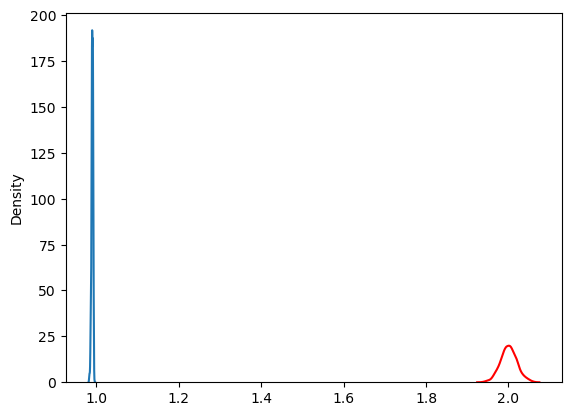

In [8]:
alpha = 0
sim_size = 1000

def bp_regression(data):
    X = sm.add_constant(data[0])
    reg = sm.OLS(data[1], X).fit()

    return reg

R2 = [bp_regression(generate_data(100, alpha)).rsquared for _ in range(sim_size)]
Beta = [bp_regression(generate_data(100, alpha)).params[1] for _ in range(sim_size)]
sns.kdeplot(R2)
sns.kdeplot(Beta, color = "red")

#### 6. Feladat

A korábban megírt függvények felhasználásával írjunk egy új függvényt, ami a $p$-érték helyett konkrét True/False értéket ad vissza a homoszkedaszticitás, mint nullhipotézis eldöntésére a Breusch-Pagan teszt alapján.

In [9]:
def my_bp_homoscedasticity_test(data, sig_level = 0.95):
    pvalue = my_bp_test(data)[1]
    if pvalue < 1-sig_level:
        return False
    else:
        return True
        
# data = generate_data(100, 0.25)
# print(my_bp_test(data))
# my_bp_homoscedasticity_test(data, 0.95)

Futtassunk szimulációt, amely az $\alpha$ paraméter különféle értékeire megvizsgálja, hogy mekkora valószínűséggel utasítja el BP-teszt a homoszkedaszticitást 95%-os szignifikanciaszinten. Milyen eredményekre számítunk az $\alpha$ függvényében, elméletileg? Ezeket az eredményeket kaptuk-e? Fogalmazzuk meg pár mondatban a konklúziókat.

In [10]:
def bp_test_sim(alpha, sim_size = 1000):
    truefalse = sum([my_bp_homoscedasticity_test(generate_data(100, alpha)) for _ in range(sim_size)])
    return 1 - truefalse / sim_size

#print(bp_test_sim(0.2, 1000))

In [11]:
# EREDMÉNYEK MEGJELENÍTÉSE

sim_size = 1000
print(f"Eredmények {sim_size} elemű mintából:\n")
for i in range(0, 21): # 10-el oszt az alphák kiszámításához, változtatható
    print(f"Alpha = {i/10}: elutasítási arány: {round(bp_test_sim(i/10, sim_size)*100,5)}%")

Eredmények 1000 elemű mintából:

Alpha = 0.0: elutasítási arány: 4.3%
Alpha = 0.1: elutasítási arány: 31.3%
Alpha = 0.2: elutasítási arány: 35.8%
Alpha = 0.3: elutasítási arány: 33.4%
Alpha = 0.4: elutasítási arány: 36.9%
Alpha = 0.5: elutasítási arány: 37.1%
Alpha = 0.6: elutasítási arány: 36.4%
Alpha = 0.7: elutasítási arány: 36.0%
Alpha = 0.8: elutasítási arány: 36.6%
Alpha = 0.9: elutasítási arány: 33.8%
Alpha = 1.0: elutasítási arány: 37.0%
Alpha = 1.1: elutasítási arány: 33.8%
Alpha = 1.2: elutasítási arány: 36.3%
Alpha = 1.3: elutasítási arány: 34.1%
Alpha = 1.4: elutasítási arány: 34.6%
Alpha = 1.5: elutasítási arány: 36.2%
Alpha = 1.6: elutasítási arány: 36.3%
Alpha = 1.7: elutasítási arány: 34.0%
Alpha = 1.8: elutasítási arány: 36.3%
Alpha = 1.9: elutasítási arány: 36.9%
Alpha = 2.0: elutasítási arány: 35.3%


<div style="color: blue">
Válasz: Az $\alpha$ érték növekedése mellett magasabb elutasítási arányt várunk, amit a szimuláció visszaigazol, viszont a vártakkal ellentétben, ez nem látszólag nem fog a végtelenségig tovább nőni. $\alpha = 0$ esetén az elutasítás valószínűsége (elsőrendű hiba) körülbelül megegyezik a megbízhatósági szinttel, amit vártukn is. A többi esetben az elutasítási arány 32-37% körüli intervallumba esik, ami nem tűnik annyira magasnak, hogy biztosak lehessünk a heteroszkedaszticitás kiszűrésének sikeréről.
</div>